# Populy
### Guía de uso en *jupyter notebook*

## Pasos previos: instalación

Populy es un paquete desarrollado en Python para la simulación de procesos evolutivos de tipo *forward evolution*.

La instalación es el primer paso antes de utilizar cualquier paquete o librería que no esté incluida en la instalación base de python. El siguiente código permite instalar el paquete utilizando la herramienta pip.

El símbolo de exclamación indica que no es un bloque de código normal, si no un comando de `shell`.

La instalación solo es necesaria una vez. Copia el código en una celda, pégalo y ejecútalo.

```
!pip install Populy
```

## Importar el paquete

La instalación hace disponible el paquete, la importación "carga" el paquete en la memoria para que sea accesible.
La forma de importar, aunque parece complicada viene a decir que "desde este archivo importa este código".

De momento importaremos tanto `Population` como `Plots`, el primero nos permite crear la población y el segundo representarla.

In [8]:
from populy.population import Population
from populy.plots import Plots

En caso de que salga un error, copiar el código de abajo y ejecutar en una celda:
```python

try:
    from populy.population import Population
except ModuleNotFoundError as e:
    import sys
    sys.path.append('populy')
finally:
    from populy.population import Population
```

## Crear una población

La forma correcta de referirse a la creación de objetos es la instanciación. En el siguiente bloque se está instanciando una nueva población.

Tenemos una nueva poblacion vacía a la cual le hemos llamado 'poblacion'. Esta poblacion tiene una serie de características, llamadas <b>atributos</b>, que la definen. En este caso sus valores son unos predeterminados pero se pueden cambiar pasandole el nuevo valor del atributo dentro del paréntesis tal y como se ha hecho con el tamaño (size)

In [9]:
# se crea una nueva poblacion donde se especifican caracteristicas generales de esta
poblacion = Population(size=1000,
                       freq={'A':(0.4,0.6),'B':(0.6,0.4)},	
                       fit={'AABB':0.2},
                       mu=(0.01,0.01))

### Ejercicio 1: atributos

**Genes**
En nuestro ejempolo `poblacion`, ¿sabrías decir cuantos genes hay? ¿sabrías interpretar los valores del diccionario freq?

**Fitness**
¿Qué puede indicar el atributo `fit`?

**mu**
¿Qué puede significar el atributo `mu`?

Si se quiere saber más sobre los posibles parámetros que incluir se puede consultar la documentación mediante la función help

In [10]:
help(Population.__init__)

Help on function __init__ in module populy.population:

__init__(self, size=100, name='Population', ploidy=2, vida_media=55, R=0.5, mu=(0, 0), freq={'A': (0.5, 0.5), 'B': (0.5, 0.5)}, D=0, fit=0, sex_system='XY', rnd=False)
    Creates a new empty population object.
    
    Parameters:
        size (int): Population size. Defaults to 100.
        name (int): Population name. Defaults to 'Population'
        ploidy (int): Number of homologous chromosomes. Defaults to 2.
        R (float) : Recombination frequency [0,0.5] where 0.5 indicates
        statistic independence. Defaults to 0.5. 
        mu (tuple(float,float)): Mutation rate. Defaults to (1e-4,1e-4).
        freq (dict): loci (key) and allelic frequencies for each allele (values).
        D (float): initial linkage desequilibrium [0,0.5]. Defaults to 0. 
        fit (int,dict): fitness function applied, can take allele fitness value
        or genotype fitness value. E.g. {'A':0.8} or {'AABB':0.8}. Every other 
        value

Este método nos da la información de la población que se le pase.

In [11]:
Population.info(poblacion)

tamaño: 1000
ploidía: 2
frecuencias alelicas iniciales: {'A': (0.4, 0.6), 'B': (0.6, 0.4)}
desequilibrio de ligamiento: 0
frecuencia de recombinacion: 0.5
tasa de mutaciones: (0.01, 0.01)
generación actual: 0
sistema de determinación del sexo: XY
tipo de selección: {'AABB': 0.2}


## Generar individuos en la población

Una vez creada la población se puede operar sobre ella. Para hacerlo se requiere de una estructura llamada método. Un método es una función asociada a un objeto, por lo que se sigue la siguiente notación:

`objeto.metodo()`

Siendo poblacion el nombre de nuestro objeto en cuestión.
Como la población que hemos creado previamente estaba vacía, es necesario introducir unos individuos en ella mediante la siguiente linea de código:

In [12]:
poblacion.initIndividuals()

Se han generado 1000 individuos en base a los atributos de la población


### Ejercicio 2: mostrar individuos 

Utilizando el método `printIndividuals` haz que se muestren por pantalla algunos individuos de la población.

In [13]:
# escribe aqui el codigo

## Evolución

El estado actual de la población es su estado inicial, es decir, se encuentra en la primera generación (generación 0).

Al igual que se ha hecho con los otros métodos `initIndividuals` y `printIndividuals` es necesario llamar ahora al método que permite hacer que la población evolucione, es decir, que vayan sucediendo nuevas generaciones.

In [14]:
poblacion.evolvePop(gens=100)

10.0% completado...
20.0% completado...
30.0% completado...
40.0% completado...
50.0% completado...
60.0% completado...
70.0% completado...
80.0% completado...
90.0% completado...
¡Evolucion completada!


No es necesario conocer el proceso de evolución en detalle, sin embargo debe saberse que el método de reproducción se lleva a cabo teniendo en cuenta el sexo del individuo y haciendo un **muestreo aleatorio con reemplazamiento**. Es decir, se toman 2 individuos, se comprueba que son de sexos distintos, se genera un descendiente y devuelve a la población original (no se eliminan).

Si da curiosidad, el algoritmo que el método evolvePop sigue es el siguiente:

1. Se escogen 2 individuos de forma aleatoria de nuestra población
2. Se comprueban una serie de parámetros (si ambos son de sexos diferentes, por ejemplo)
3. Si se cumplen estos parámetros se genera un nuevo individuo (recordemos que individuo es una forma de referirse a un objeto de la clase individuo)
4. Dentro de cada individuo se genenera su genoma (sus cromosomas homólogos ya que se trabaja con un único cromosoma)
5. Se realizan algunas operaciones más, como la posibilidad de una mutación o la recombinación
6. Se aplica (o no) una función de selección que vendrá dada por su genoma, si sobrevive se añadirá a la siguiente generación (pasará el filtro)
8. Repetir el proceso hasta que tengamos una nueva población del mismo tamaño
9. Repetir el proceso hasta llegar al número de generaciones especificada

**Nota**: el concepto de evolución en la simulación no es exactamente igual al siginficado biológico, se dice que una población evoluciona cuando pasan las generaciones.

### Ejercicio 3: evolución
En el bloque anterior se ha evolucionado la población 100 generaciones. `poblacion` ha pasado de encontrarse en la generación 0 a la generación 100. Vuelve a utilizar `evolvePop`(ya sea volviendo a ejecutar o en un nuevo bloque de código) y comprueba en qué generación se encuentra la población mediante `Population.info(poblacion)`.

## Extraer información
Una vez completada la evolucion podemos acceder a los atributos y/o metodos de nuestra poblacion para ver si ha cambiado, o que informacion se ha ido recopilando durante la evolucion.

La forma más sencilla de obtener un resumen de los datos es utilizando el método `getDataFrame` que permite obtener una tabla (dataframe) donde se encuentra el resultado de la población.

In [15]:
# obtenemos la evolución de las frecuencias alélicas para el alelo mayor
poblacion.getDataFrame("alleles")

,p(A),p(B)
gen.0,0.404500,0.606500
gen.10,0.250250,0.414086
gen.20,0.191808,0.363137
gen.30,0.148352,0.312687
gen.40,0.122378,0.290709
gen.50,0.085914,0.247253
gen.60,0.075924,0.195305
gen.70,0.039960,0.194306
gen.80,0.005994,0.172827
gen.90,0.004995,0.176823


### Ejercicio 4: Cambio en las frecuencias
Observando la última fila de nuestra tabla de datos ¿dirías que las frecuencias alelicas han cambiado?

## Representar gráficamente la evolución

Para saber si la población ha evolucionado en el sentido biológico se puede comprobar el cambio en las frecuencias alélicas. Para nuestro ejemplo se ha especificado una población diploide con 2 locus (o genes) A y B, cada uno con un alelo mayor (A/B) y menor (a/b). 

La mejor forma de visualizar este cambio es utilizando la representación gráfica. Para ello se utilizará el módulo `plots` de la siguiente forma:

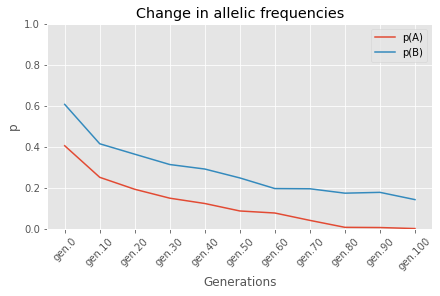

In [16]:
Plots.alleles(poblacion)

Si lo que se busca es obtener un resultado conjunto del cambio en los alelos, gametos, sexos y mutaciones se puede utilizar el siguiente método

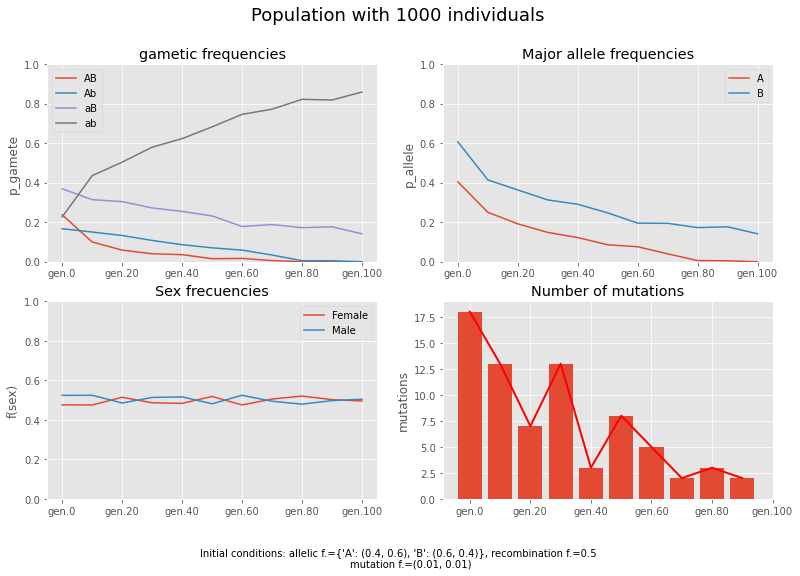

In [17]:
# obtiene un resumen del cambio en la frecuencia alelica y gametica
poblacion.plotAll()

### Ejercicio 5: interpretación
¿ Cuál dirías que son las fuerzas evolutivas que actúan en esta población?

## Extra
### Concatenacion de varias poblaciones
Al metodo `initIndividuals` visto anteriormente podemos pasarle una población ya iniciada siempre y cuando tenga la misma estructura genética que la población que estamos construyendo (ej: no se puede pasar individuos con un solo locus 'A' cuando queremos que la poblacion tenga dos locus 'A','B')

En el siguiente código se crea una nueva población `newPop` a la cual se le pasará los individuos de la población anterior llamada `poblacion`.

In [18]:
# Creamos la nueva poblacion vacia
newPop = Population(size=200,fit={'aabb':0})

# Esta vez la llenamos de individuos ya existentes en la poblacion anterior
newPop.initIndividuals(pop = poblacion.getCurrentIndividuals(10))


La población se ha iniciado con 10 individuos introducidos 


In [19]:
Population.info(newPop)

tamaño: 200
ploidía: 2
frecuencias alelicas iniciales: {'A': (0.5, 0.5), 'B': (0.5, 0.5)}
desequilibrio de ligamiento: 0
frecuencia de recombinacion: 0.5
tasa de mutaciones: (0, 0)
generación actual: 0
sistema de determinación del sexo: XY
tipo de selección: {'aabb': 0}


### Ejercicio 6
Al igual que se ha hecho anteriormente, llama a los métodos correspondientes para evolucionar y representar la nueva población. 

**Nota1**: haz que la población evolucione durante 120 generaciones. **Nota2**: utiliza el método `.plotAll()` para representar todos los cambios en la población.


In [20]:
newPop.evolvePop(100)


10.0% completado...
20.0% completado...
30.0% completado...
40.0% completado...
50.0% completado...
60.0% completado...
70.0% completado...
80.0% completado...
90.0% completado...
¡Evolucion completada!


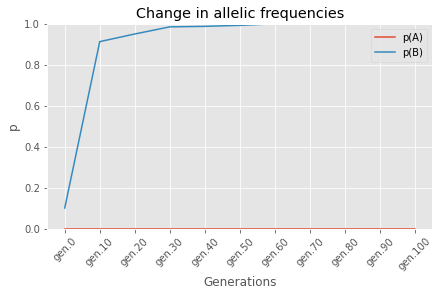

{'A': 0.0, 'B': 1.0}


In [21]:
Plots.alleles(newPop)
print(newPop.alleleFreq())

### Ejercicio 7: extra

¿Existe alguna analogía en las poblaciones reales que explique este fenómeno observado? 

## Simulación de múltiples poblaciones

Para trabajar con múltiples poblaciones idénticas se debe importar el módulo superpop:

In [22]:
from populy.superpop import Superpop

# permite eliminar el output por terminal
from IPython.display import clear_output

La forma de funcionar es similar a la vista anteriormente. En este caso para la creación de un conjunto de poblaciones se utilizará `Superpop`. A este objeto se le debe pasar el número de poblaciones y su tamaño.

In [23]:
# creamos el objeto
varias_poblaciones = Superpop(popsize=100,n=10)


Se han generado 100 individuos en base a los atributos de la población
Se han generado 100 individuos en base a los atributos de la población
Se han generado 100 individuos en base a los atributos de la población
Se han generado 100 individuos en base a los atributos de la población
Se han generado 100 individuos en base a los atributos de la población
Se han generado 100 individuos en base a los atributos de la población
Se han generado 100 individuos en base a los atributos de la población
Se han generado 100 individuos en base a los atributos de la población
Se han generado 100 individuos en base a los atributos de la población
Se han generado 100 individuos en base a los atributos de la población


En este caso el objeto `varias_poblaciones` contiene un total de 10 poblaciones, cada una con 100 individuos.

El siguiente paso es evolucionar

In [24]:
# evoluciona la poblacion
varias_poblaciones.evolvePops(gens=100)
# evita mostrar el output por terminal
clear_output()

Por último se representa el resultado

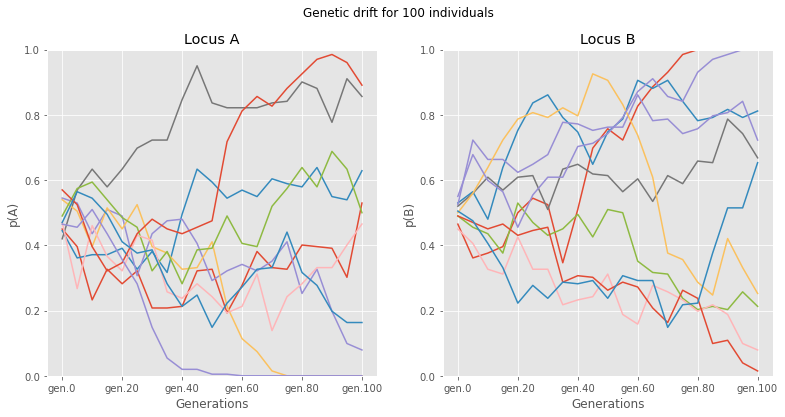

In [25]:
varias_poblaciones.plotPops()

### Ejercicio 8: interpretación de resultados

¿Qué fenómeno o mecansimo evolutivo dirías que está actuando en estas poblaciones?


### Ejercicio avanzado:

Averigua la frecuencia de fijación de A y B.

Quizá es demasiado complejo? Hacerlo pero más simple

In [26]:

for poblacion in varias_poblaciones.sPop:
    for alelo in poblacion.fixedLoci():
        print(alelo,end=" ")
    print("")

0 B 
0 0 
0 0 
0 0 
a 0 
0 0 
0 0 
0 0 
0 0 
a B 


In [27]:
# Lista de poblaciones
pops = varias_poblaciones.sPop
# para ver el tamaño de la lista, es decir, el numero de subpoblaciones...
size = len(pops)
print(size)

# para ver las frecuencias alelicas de la ultima generacion recorremos la lista
fA = [0,0]
fB = [0,0]
print(f'Frecuencias alelicas en la ultima generacion {pops[0].gen}')
for i,poblacion in enumerate(pops):
    frecuencias_alelicas = poblacion.alleleFreq()
    print('Poblacion 0: ',frecuencias_alelicas)
    # contamos cuantos alelos se han fijado
    if frecuencias_alelicas['A'] == 1:
        fA[0] +=1
    elif frecuencias_alelicas['A'] == 0:
        fA[1] +=1 
    if frecuencias_alelicas['B'] == 1:
        fB[0] +=1
    elif frecuencias_alelicas['B'] == 0:
        fB[1] += 1
# calculamos el porcentaje sobre el total
fA = [(x/size)*100 for x in fA]
fB = [(x/size)*100 for x in fB]

print(f'Frecuencia de fijación de A: {fA[0]}% \t de a {fA[1]}%',
      f'Frecuencia de fijación de B: {fB[0]}% \t de b {fB[1]}%',sep='\n')

10
Frecuencias alelicas en la ultima generacion 100
Poblacion 0:  {'A': 0.5297029702970297, 'B': 1.0}
Poblacion 0:  {'A': 0.6287128712871287, 'B': 0.8118811881188119}
Poblacion 0:  {'A': 0.07920792079207921, 'B': 0.7227722772277227}
Poblacion 0:  {'A': 0.8564356435643565, 'B': 0.6683168316831684}
Poblacion 0:  {'A': 0.0, 'B': 0.2524752475247525}
Poblacion 0:  {'A': 0.5, 'B': 0.21287128712871287}
Poblacion 0:  {'A': 0.4653465346534653, 'B': 0.07920792079207921}
Poblacion 0:  {'A': 0.8910891089108911, 'B': 0.01485148514851485}
Poblacion 0:  {'A': 0.16336633663366337, 'B': 0.6534653465346535}
Poblacion 0:  {'A': 0.0, 'B': 1.0}
Frecuencia de fijación de A: 0.0% 	 de a 20.0%
Frecuencia de fijación de B: 20.0% 	 de b 0.0%
